In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 43kB/s 


In [2]:
!nvidia-smi

Mon Apr 12 10:47:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow as tf

In [5]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout,Input, Lambda

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



# from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

import warnings
warnings.filterwarnings("ignore")

In [6]:
print("Tensorflow-version:", tensorflow.__version__)

Tensorflow-version: 2.4.1


In [7]:
size = 32
model_name  = 'handwrittern bangla letter32 VGG19.h5'
batch_size = 16
IMAGE_SIZE = [size,size ]
path = '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/'

train_path = path + 'Train'
test_path = path + 'Test'

In [8]:
folders = glob(train_path + '/*')

In [9]:
# model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(size, size, 3,),classes=50,pooling='avg') 
model_d=VGG19(weights='imagenet',include_top=False, input_shape=(size, size, 3,),classes=50) 
# model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(size, size, 3,)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(len(folders),activation='softmax')(x) #FC-layer

80142336/80134624 [==============================] - 1s 0us/step


In [10]:
model = Model(inputs=model_d.input, outputs=preds)
# model.summary()

In [11]:
# don't train existing weights
#for layer in model.layers:
#    layer.trainable = False


# for layer in model.layers[:-8]:
#     layer.trainable=False
    
# for layer in model.layers[-8:]:
#     layer.trainable=True

In [12]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint(model_name, verbose=1, save_best_only=True)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
# Make sure you provide the same target size as initialied for the image size


In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (size, size),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

Found 12062 images belonging to 50 classes.


In [15]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (size, size),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

Found 3010 images belonging to 50 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  callbacks=[anne, checkpoint],
  validation_steps=len(test_set)
)

Epoch 1/100
754/754 [==============================] - 4766s 6s/step - loss: 4.3199 - accuracy: 0.0411 - val_loss: 3.7444 - val_accuracy: 0.0691

Epoch 00001: val_loss improved from inf to 3.74443, saving model to handwrittern bangla letter32 VGG19.h5
Epoch 2/100
754/754 [==============================] - 41s 55ms/step - loss: 3.7272 - accuracy: 0.0520 - val_loss: 3.2311 - val_accuracy: 0.0804

Epoch 00002: val_loss improved from 3.74443 to 3.23113, saving model to handwrittern bangla letter32 VGG19.h5
Epoch 3/100
754/754 [==============================] - 41s 54ms/step - loss: 3.4999 - accuracy: 0.0614 - val_loss: 3.4394 - val_accuracy: 0.0618

Epoch 00003: val_loss did not improve from 3.23113
Epoch 4/100
754/754 [==============================] - 41s 54ms/step - loss: 3.3752 - accuracy: 0.0589 - val_loss: 4.8985 - val_accuracy: 0.0226

Epoch 00004: val_loss did not improve from 3.23113
Epoch 5/100
754/754 [==============================] - 41s 54ms/step - loss: 3.2633 - accuracy: 0.

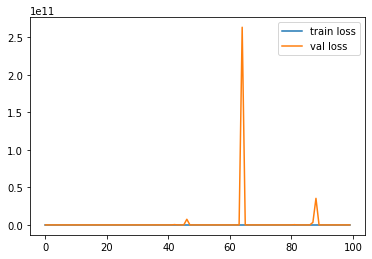

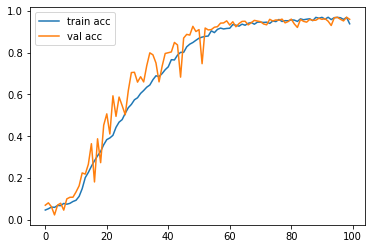

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save(model_name)

In [19]:
y_pred = model.predict(test_set)
y_pred

array([[3.5341060e-08, 1.5028903e-08, 7.3023692e-08, ..., 3.8949533e-08,
        6.2852785e-09, 9.0768239e-08],
       [1.9231589e-10, 5.9397665e-10, 3.8036791e-09, ..., 5.7628782e-09,
        3.4992428e-10, 1.9452850e-08],
       [3.0454366e-09, 2.6903555e-07, 3.1465140e-11, ..., 1.9332266e-08,
        1.9601053e-07, 3.4351988e-08],
       ...,
       [1.8070195e-07, 1.0602632e-06, 3.0750164e-07, ..., 4.1448957e-06,
        1.6340894e-06, 2.3979335e-05],
       [1.8313179e-07, 2.7889675e-08, 5.5565945e-08, ..., 4.6207265e-07,
        3.8136250e-07, 1.2906895e-07],
       [7.4858754e-06, 4.2295176e-07, 1.6654883e-05, ..., 8.9899497e-04,
        1.2763173e-04, 6.3485709e-06]], dtype=float32)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model(model_name)
new_model = tf.keras.models.load_model(model_name)

# Check its architecture
new_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [21]:
loss, acc = new_model.evaluate(test_set, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

189/189 - 4s - loss: 0.1866 - accuracy: 0.9588
Restored model, accuracy: 95.88%


In [22]:
from google.colab import files
import pandas as pd
files.download('/content/handwrittern bangla letter32 VGG19.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>